## Re-doing Los Angeles Income Profile
Well, well, well, back at it again. The reason that I am re-doing or furthering my LA Income Profile assignment is because I encountered issues last week when mapping the census tracts by median household income. Although I was able to add color symbology to the census tracts depending on median household income, I was unable to create any map that was more indepth or informational. Also, the map I made didn't have a basemap either. So today I will be briefly going through the process of creating a more informational and aesthetically pleasing map. Note: Because I already wrote extensively explaining my code in the previous assignment, I will be more brief and group my codes. LETS JUMP IN AND LEARN ABOUT INCOME INEQUALITY IN LOS ANGELES!

Author: Brian Ramirez

### Importing libraries
BEFORE we go any further, we must import the following libraries: pandas, geopandas, and folium. We will use pandas to open our csv census data. We will use geopandas to open our geoJSON census data. We will be using folium to finally create our beautiful map!

In [1]:
import pandas as pd
import geopandas as gpd
import folium

### Reading our Income CSV data
ALRIGHTY! First we have to read in our csv data using pandas and then we have to execute our usual inspections of our data. This inspection includes running the shape and head command. Like last time, the census data comes with columns with unreadable names so I renamed them.

In [2]:
# load a data file
# note the relative filepath! where is this file located?
income = pd.read_csv('newdata2/income(csv).csv')

In [3]:
income.shape

(1004, 4)

In [4]:
income.head()

,geoid,name,B19013001,"B19013001, Error"
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0


In [5]:
income.columns = ['geoid',
 'Census_Tract',
 'Median_Household_Income',
 'Error',]

In [6]:
income.head()

,geoid,Census_Tract,Median_Household_Income,Error
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0


### Creating histogram and bar charts for our Income data
Now that we have our data read to go, we can start to create charts that will help us really visualize income in Los Angeles. The first being a histogram chart of all Median Household Incomes in Los Angeles by Census Tract. 

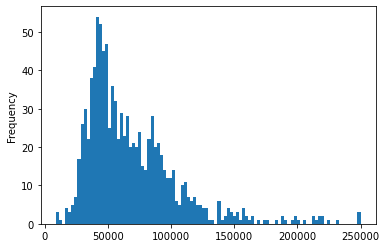

In [7]:
# plot it as a historgram with 50 bins
income['Median_Household_Income'].plot.hist(bins=100)

After running the .plot.hist command and choosing a large bins number (100) because we have many census tracts, we get a histogram chart with median household income in the x axis and frequency of a given median household income in the y axis. What we can see from this chart is that there is a great frequency of census tracts with median household incomes around $50,000/year. The distribution in the histogram is skewed to the right, meaning that there are census tract outliers with really higher incomes. In pursuit of learning about income inequality in Los Angeles, now I want to really explore where are the census tracts with the LOWEST and HIGHEST incomes in Los Angeles.

To create two bar charts about the census tracts with the LOWEST and HIGHEST incomes in Los Angeles, we should first sort our census data to feature the lowest and highest first. This will make creating the histograms easier.

In [8]:
lowest_incomes = income.sort_values(by='Median_Household_Income',ascending = True)
highest_incomes = income.sort_values(by='Median_Household_Income',ascending = False)

To sort our data, I used the .sort_values command and created two new versions of our census data. One with lowest incomes first and the other with highest incomes first. Now that we have these two, we can create two bar charts of the census tracts with the 10 HIGHEST and LOWEST incomes in Los Angeles.

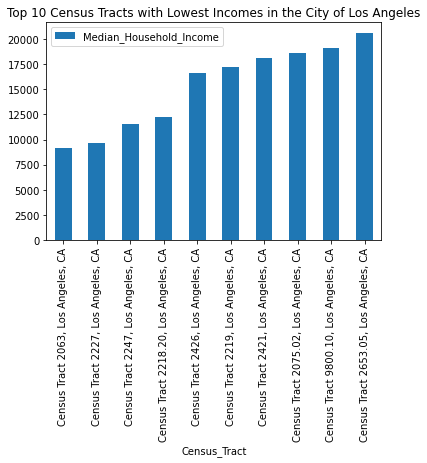

In [9]:
lowest_incomes.head(10).plot.bar(x='Census_Tract',
                            y='Median_Household_Income', 
                            title='Top 10 Census Tracts with Lowest Incomes in the City of Los Angeles')

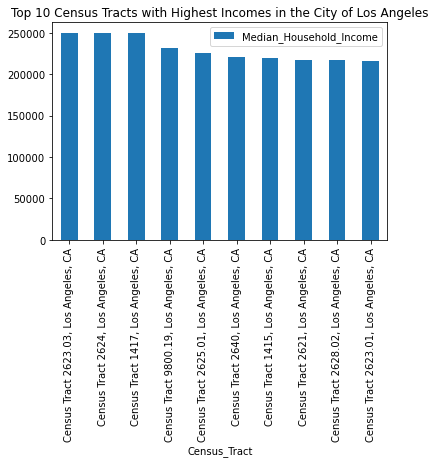

In [10]:
highest_incomes.head(10).plot.bar(x='Census_Tract',
                            y='Median_Household_Income', 
                            title='Top 10 Census Tracts with Highest Incomes in the City of Los Angeles')

After running the plot.bar command twice for each HIGHEST and LOWEST income sets, we get two bar charts with census tracts with the 10 HIGHEST and LOWEST incomes. What we can learn from these two bar charts is that the census tracts with the 10 LOWEST incomes have incomes less than 20,000. On the other hand, the census tracts with the 10 HIGHEST incomes have incomes more than 200,000. CRAZY. ABSOLUTELY CRAZY. On one side of the city you have people living with incomes way below the national average. On the other side of the city you have people with incomes WAY HIGHER than the national average. ALTHOUGH seeing numbers is really helpful. What about seeing these census tracts on a map?

### Reading our Income geoJSON data
Similar to earlier, we have to read in our geoJSON data. After reading it in, we once again conduct our usual inspection and make any necessary changes to our data. Once we have all of our rows and columns in order, we are ready to start plotting our data.

In [12]:
# read in a geojson file downloaded from the LA Times
income2=gpd.read_file('newdata1/income.geojson')
income2.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [13]:
income2.columns = ['geoid',
 'Census_Tract',
 'Median_Household_Income',
 'Error',
 'geometry']

In [14]:
income2.head()

,geoid,Census_Tract,Median_Household_Income,Error,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


### Creating maps of our Income geoJSON data
To start us off with the most basic visual mapping of our data we will use the .plot command. This command will show us the census tracts in our data and ONLY THAT. For someone who may not know what Los Angeles looks like, this might be very helpful and informative. For us not so much. So what we will do now is to use the .plot command but specify that we want to see different color symbologies for different median household incomes.

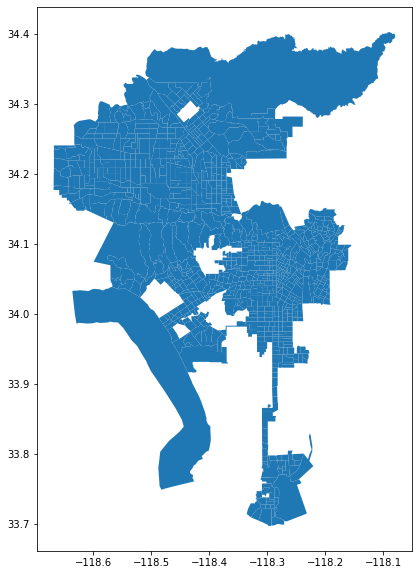

In [15]:
income2.plot(figsize=(12,10))

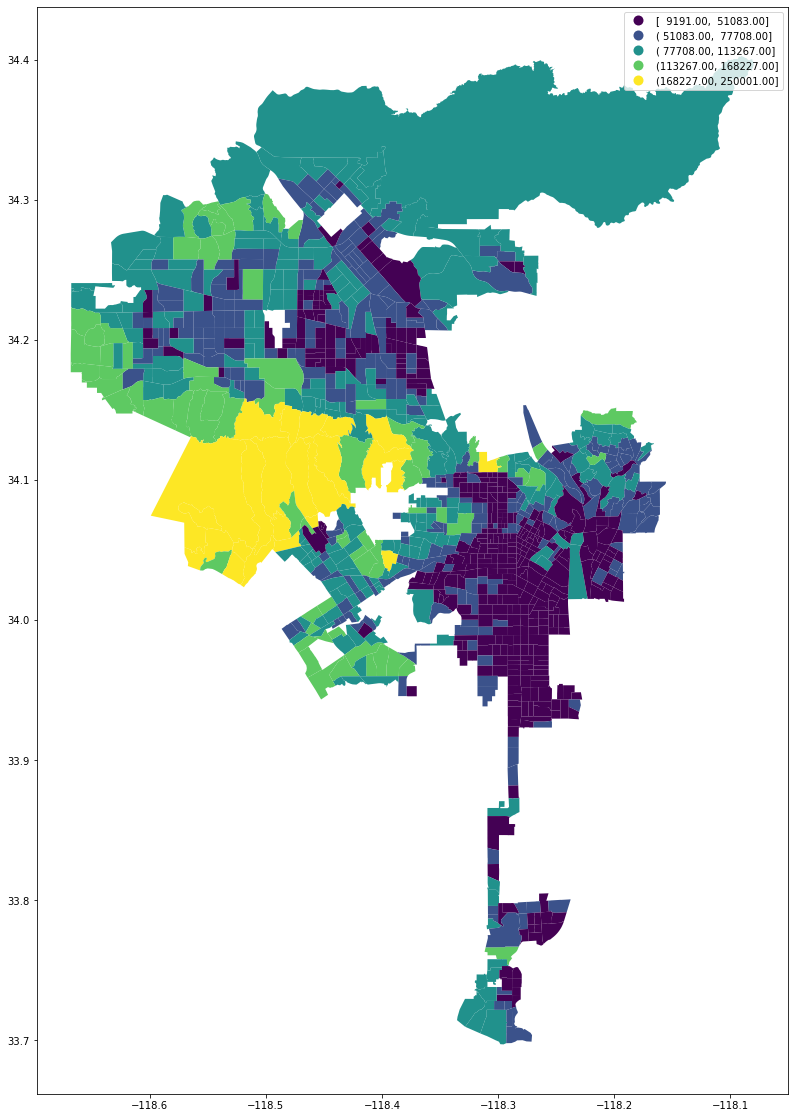

In [16]:
income2.plot(figsize=(15,20),
                 column='Median_Household_Income',
                 legend=True, 
                 scheme='NaturalBreaks')

Once again, using the .plot command but specifying that we want different colors for different values of median household income, we get a colorful map of median household income in Los Angeles. This in itself is a really good level of analysis for income inequality. What we notice is that the lowest incomes are disproportionately present in central LA and south LA, while the highest incomes are present near Beverly Hills and the lower valley. For someone who knows LA, this is no surprise. If we wanted a further in depth view of this income inequality we can go further and map the two ends of the spectrum separately using the same technique we used here. But first, what I did was I specified from all census tracts that I only wanted incomes less than 50000 and greater than 100000. Two very different groups, which will be fruitful to look at separately. 

In [17]:
income2[income2.Median_Household_Income < 50000]

,geoid,Census_Tract,Median_Household_Income,Error,geometry
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
20,14000US06037104203,"Census Tract 1042.03, Los Angeles, CA",49609.0,11898.0,"MULTIPOLYGON (((-118.41799 34.27964, -118.4170..."
30,14000US06037104701,"Census Tract 1047.01, Los Angeles, CA",35357.0,6270.0,"MULTIPOLYGON (((-118.42190 34.26624, -118.4213..."
31,14000US06037104703,"Census Tract 1047.03, Los Angeles, CA",41875.0,14155.0,"MULTIPOLYGON (((-118.40909 34.25446, -118.4072..."
...,...,...,...,...,...
975,14000US06037296901,"Census Tract 2969.01, Los Angeles, CA",40913.0,11667.0,"MULTIPOLYGON (((-118.30119 33.72883, -118.3011..."
978,14000US06037297110,"Census Tract 2971.10, Los Angeles, CA",40000.0,7158.0,"MULTIPOLYGON (((-118.28793 33.73241, -118.2879..."
979,14000US06037297120,"Census Tract 2971.20, Los Angeles, CA",49229.0,11003.0,"MULTIPOLYGON (((-118.28798 33.72299, -118.2879..."
987,14000US06037701100,"Census Tract 7011, Los Angeles, CA",45536.0,34084.0,"MULTIPOLYGON (((-118.46889 34.06587, -118.4687..."


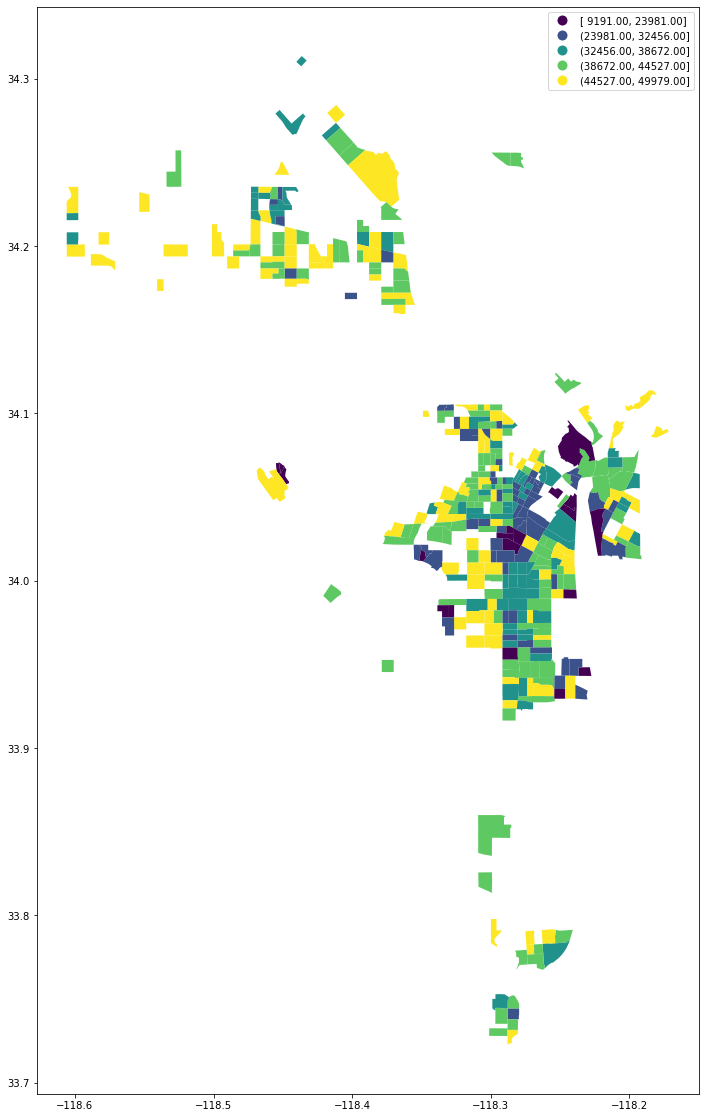

In [18]:
# Census tracts where the median household income is below $50,000
income2[income2.Median_Household_Income < 50000].plot(figsize=(15,20),
                                             column='Median_Household_Income',
                                             legend=True, 
                                             scheme='NaturalBreaks')

After running our first analysis of census tracts with median household incomes less than 50000, we can now get a closer look at the inequality in the inequality if that even makes sense. It kinda doesn't because either way each of these groups are impacted by the greater income inequality. There isn't any particular pattern that is apparent, but the locations of these census tracts is relevant. Once again, central and south LA is overrepresented in this map.

In [19]:
income2[income2.Median_Household_Income > 100000]

,geoid,Census_Tract,Median_Household_Income,Error,geometry
9,14000US06037102107,"Census Tract 1021.07, Los Angeles, CA",109375.0,16677.0,"MULTIPOLYGON (((-118.36789 34.23939, -118.3678..."
13,14000US06037103300,"Census Tract 1033, Los Angeles, CA",105909.0,38437.0,"MULTIPOLYGON (((-118.37523 34.25695, -118.3741..."
49,14000US06037106603,"Census Tract 1066.03, Los Angeles, CA",112404.0,11166.0,"MULTIPOLYGON (((-118.54778 34.32689, -118.5477..."
51,14000US06037106641,"Census Tract 1066.41, Los Angeles, CA",110357.0,13551.0,"MULTIPOLYGON (((-118.51728 34.30194, -118.5157..."
52,14000US06037106642,"Census Tract 1066.42, Los Angeles, CA",109063.0,14678.0,"MULTIPOLYGON (((-118.51515 34.29275, -118.5151..."
...,...,...,...,...,...
972,14000US06037296402,"Census Tract 2964.02, Los Angeles, CA",108929.0,31174.0,"MULTIPOLYGON (((-118.30969 33.74337, -118.3096..."
977,14000US06037297000,"Census Tract 2970, Los Angeles, CA",110699.0,26855.0,"MULTIPOLYGON (((-118.32037 33.73577, -118.3199..."
982,14000US06037297300,"Census Tract 2973, Los Angeles, CA",102143.0,28917.0,"MULTIPOLYGON (((-118.32118 33.71756, -118.3204..."
994,14000US06037980019,"Census Tract 9800.19, Los Angeles, CA",231250.0,117385.0,"MULTIPOLYGON (((-118.59919 34.07436, -118.5991..."


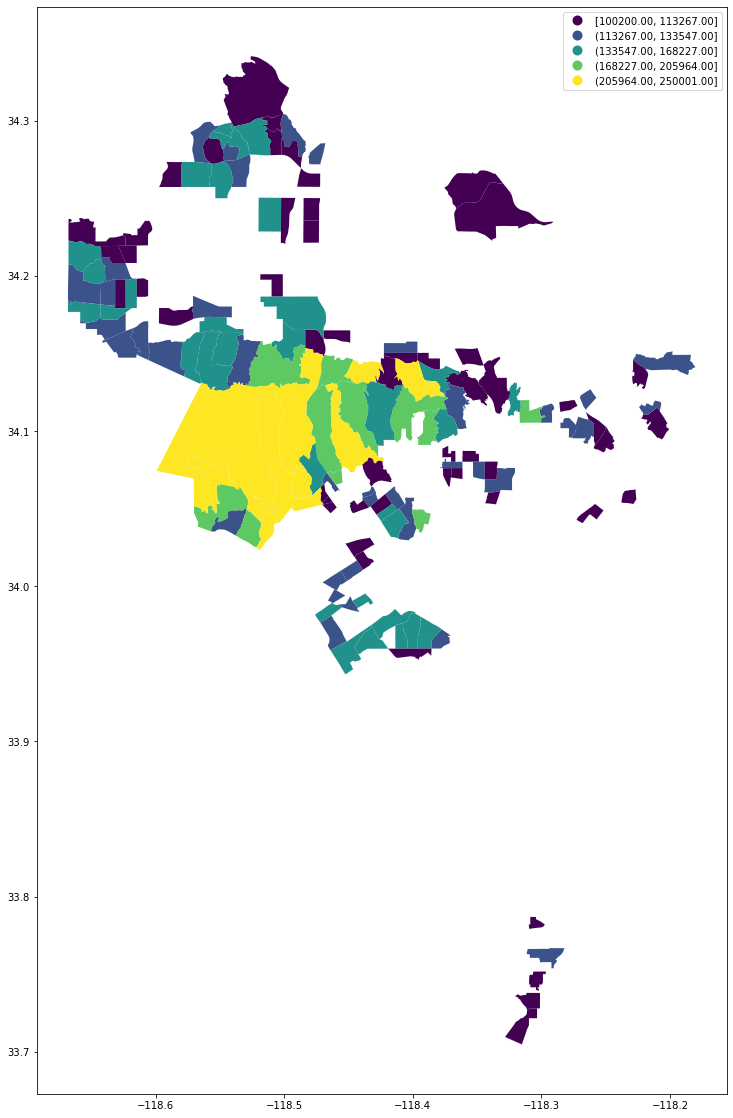

In [20]:
# Census tracts where the median household income is greater than $100,000
income2[income2.Median_Household_Income > 100000].plot(figsize=(15,20),
                                             column='Median_Household_Income',
                                             legend=True, 
                                             scheme='NaturalBreaks')

ALRIGHTY NOW THE RICH PPL! Similar to the other analysis, I am now mapping the census tracts with median household incomes greater than 100000. What is more readily apparent is that a majority are in the valley, closer to the hills, or closer to the ocean. NOW FOR THE MAIN EVENT! THE REASON WE ARE HERE! ITS TIME TO CREATE OUR LONG AWAITED FOLIUM MAP. Using folium, I will be creating an INTERACTIVE map of median household income by census tract in Los Angeles. Although I ran into issues figuring out the code to connect my own data to the choropleth command, I was finally able to figure it out. 

In [21]:
import folium

In [27]:
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 10,
               tiles='OpenStreetMap', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=income2, # geo data
                  data=income, # data          
                  key_on='feature.properties.Census_Tract', # key, or merge column
                  columns=['Census_Tract', 'Median_Household_Income'], # [key, value]
                  fill_color='YlOrRd',
                  line_weight=0.2, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Median Household Income per Census Tract (ACS 2019 5-Year Estimates)').add_to(m)    # name on the legend color bar
m

After running the folium map and choropleth commands, I was able to create this here interactive map which visualizes median household income by census tract in Los Angeles. Incomes go from being lower in the yellow to greater in the red. As we have explored in our other analysis. The red is mostly concentrated near Beverly Hills, the lower Valley, and closest to the ocean. I also featured a basemap which makes visualization easier. The black areas are areas with no data available I believe. Overall, this map was really cool and fun to make AND it is just really interesting to interact with.

## Conclusion
In conclusion, income inequality in Los Angeles certainly does exist and using the maps above we can see it very clearly. Even more interestingly enough, we can see both sides of this inequality. Last week I was left unsatisified by the level of analysis I made with my honestly nice maps, but this week I am left proud of the map above which really accentuates the epitome of this profile. Thank you for reading. 